In [2]:
%matplotlib inline
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from pylab import *
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
from sklearn import linear_model

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.naive_bayes import GaussianNB
from collections import OrderedDict
from sklearn import mixture
from sklearn import cluster, preprocessing, mixture 
#　データセット読み込み
df = pd.read_csv('Perovskite_Water_Splitting_Dup.csv')
df = df.rename(columns={'B1_mole': 'B1 mole'})
df_per = pd.read_csv('periodictable.csv')

In [3]:
######化学式で分類して各行をLabelで分類できるようにする

df.iloc[:,1:8] = df.iloc[:,1:8].fillna(value = 'non')#.drop_duplicates()
df["Label"] = df.iloc[:,1:8].sum(axis = 1)

df["Label"] = [a.replace("non","") for a in df["Label"]]

df

,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT,Calc,Prom Meth,Promoter,Prom,Crystal,BandGap,Surface Area,CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light,Power,Wave,ProdRate,Label
0,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1373.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,SrTiO
1,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,1.3,1.0,0.0,NaN,NaN,Xe,300.0,300.0,540.00,SrTiO
2,[S1],Sr,non,non,Ti,non,non,O,NaN,0.478,NaN,NaN,0.261,NaN,NaN,0.262,NaN,flux,1173.0,10.0,impreg,Rh,0.1,cubic,3.20,1.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,32.00,SrTiO
3,[S1],Sr,non,non,Ti,Al,non,O,NaN,0.477,NaN,NaN,0.261,0.0001,NaN,0.262,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,0.9,1.0,0.0,NaN,NaN,Xe,300.0,300.0,40.00,SrTiAlO
4,[S1],Sr,non,non,Ti,Al,non,O,NaN,0.477,NaN,NaN,0.260,0.0010,NaN,0.261,NaN,flux,1273.0,10.0,impreg,Rh,0.1,cubic,3.20,2.7,1.0,0.0,NaN,NaN,Xe,300.0,300.0,380.00,SrTiAlO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,1073.0,2.0,NaN,NaN,NaN,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,14.37,LaCoO
536,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.1,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,22.75,LaCoO
537,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SSR,773.0,2.0,NaN,Au,0.5,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,33.53,LaCoO
538,[S151],La,non,non,Co,non,non,O,NaN,0.565,NaN,NaN,0.240,NaN,NaN,0.195,NaN,SG,773.0,2.0,NaN,Au,1.0,rhombohedral,1.42,NaN,1.0,0.0,CH2O,NaN,Xe,500.0,NaN,28.74,LaCoO


In [71]:
######　組合せの種類を見つけ出す。
######　それぞれの組合せでの値(散布図)を表示させる。(例：色を変えて一つの図にプロット?)
######　組合せごとの傾向が見れるかもしれない。


######　組合せの種類を見つけ出す。
######　元素記号をkeyにして各元素のLavelのlistをvalueにもつ辞書を作っておくと便利??
set(df['A'])
dic_A_label_list = {}
for i in set(df['A']):
    print(i, df[df["A"] == i].drop_duplicates(subset = 'Label')['Label'])
    dic_A_label_list[i] = list(df[df["A"] == i].drop_duplicates(subset = 'Label')['Label'])
#dic_A_label_list    


Ag 381    AgTaO
382    AgNbO
421    AgSbO
Name: Label, dtype: object
Li 128    LiTaO
446    LiNbO
Name: Label, dtype: object
Co 389    CoCaNbO
390    CoSrNbO
391    CoBaNbO
Name: Label, dtype: object
In 179    InNiTaO
223      InTaO
386    InBaNbO
387    InSrNbO
388    InCaNbO
Name: Label, dtype: object
Cr 451    CrTiTaO
Name: Label, dtype: object
Zn 22       ZnInS
23     ZnAgInS
62       ZnCdS
76       ZnTiS
302      ZnGaO
494    ZnCuCdS
Name: Label, dtype: object
Sb 89     SbTiS
106    SbNbO
108    SbTaO
Name: Label, dtype: object
Cu 46      CuInS
47    CuInGaS
Name: Label, dtype: object
Bi 113      BiNaTiO
143        BiTiO
164      BiSrNbO
165      BiBaNbO
166      BiCaNbO
184     BiKLaTaO
189        BiTaO
194      BiCaTaO
199      BiBaTaO
233    BiLaNbAlO
251      BiTaCuO
275      BiSrTaO
412        BiFeO
Name: Label, dtype: object
Ni 308    NiGaO
Name: Label, dtype: object
Na 85       NaCaNbO
118        NaTaO
168       NaKTaO
204       NaYTaO
205      NaLaTaO
206      NaYbTaO
208 

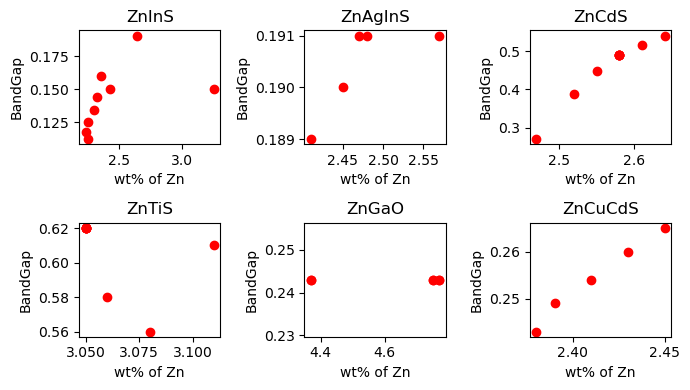

In [74]:
#####　Znを例にしてそれぞれの組合せごとに傾向を見てみる
fig, ax =  subplots(2,3, figsize = (7,4), dpi = 100, tight_layout = True)
for i,j in zip(ax.flatten(), dic_A_label_list["Zn"]):
    i.scatter(df[df['Label'] == j]["BandGap"],df[df['Label'] == j]["A mole"], c = 'r')
    i.set(xlabel = "wt% of Zn", ylabel = "BandGap",title = j)
    


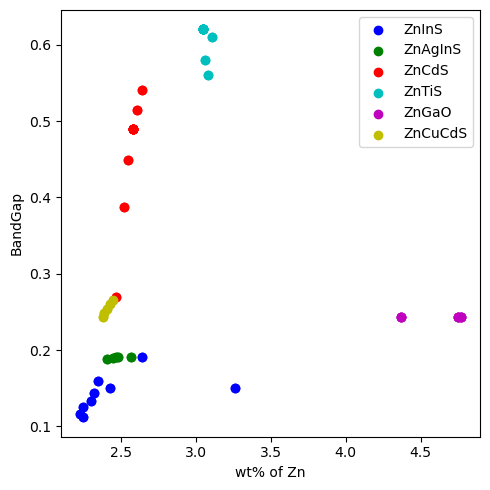

In [89]:
###### 1つの散布図にLabelごとに色を変えてscatter
color_lis = ["b","g","r","c","m","y"]
fig, ax =  subplots(1,1, figsize = (5,5), dpi = 100, tight_layout = True)

x_data = [df[df['Label'] == j]["BandGap"] for j in dic_A_label_list["Zn"]]
y_data = [df[df['Label'] == j]["A mole"] for j in dic_A_label_list["Zn"]]

for j,i in zip(dic_A_label_list["Zn"], color_lis):
    ax.scatter(df[df['Label'] == j]["BandGap"],df[df['Label'] == j]["A mole"], c = i)
    ax.set(xlabel = "wt% of Zn", ylabel = "BandGap")
scatters = [ax.scatter(df[df['Label'] == j]["BandGap"],df[df['Label'] == j]["A mole"], c = i) for j,i in zip(dic_A_label_list["Zn"], color_lis)]
ax.legend(handles = scatters,
         labels = [j for j in dic_A_label_list["Zn"]],)

In [108]:
###### pairwise correlatonをLabelごとにやる
print(dic_A_label_list.keys())
df[df["Label"] == dic_A_label_list["Sr"][2]].loc[:,["A mole","B mole","X mole","CalcT",
                                                    "BandGap","Surface Area","ProdRate"]].corr()

df[df["Label"] == dic_A_label_list["Sr"][2]]

dict_keys(['Ag', 'Li', 'Co', 'In', 'Cr', 'Zn', 'Sb', 'Cu', 'Bi', 'Ni', 'Na', 'Ca', 'Ba', 'Sr', 'Ga', 'Mn', 'La', 'Sm', 'Y', 'K'])


,Ref,A,A1,A2,B,B1,B2,X,X1,A mole,A1 mole,A2 mole,B mole,B1 mole,B2 mole,X mole,X1 mole,Prep Meth,CalcT,Calc,Prom Meth,Promoter,Prom,Crystal,BandGap,Surface Area,CatW,Alcohol%,Sac. Agent1,Sac. Agent2,Light,Power,Wave,ProdRate,Label
8,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.475,0.004,NaN,0.260,0.001,NaN,0.260,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.95,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,66.0,SrLaTiCrO
9,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.473,0.007,NaN,0.258,0.003,NaN,0.259,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.90,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,75.0,SrLaTiCrO
10,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.468,0.015,NaN,0.256,0.006,NaN,0.256,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.92,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,76.0,SrLaTiCrO
11,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.465,0.018,NaN,0.254,0.007,NaN,0.255,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.80,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,90.0,SrLaTiCrO
12,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.463,0.022,NaN,0.253,0.008,NaN,0.254,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.85,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,71.0,SrLaTiCrO
13,[S3],Sr,La,non,Ti,Cr,non,O,NaN,0.458,0.029,NaN,0.250,0.011,NaN,0.251,NaN,HT,NaN,NaN,PD,Pt,0.5,cubic,2.90,NaN,0.5,20.0,NaN,NaN,Xe,300.0,420.0,39.0,SrLaTiCrO
499,[S146],Sr,La,non,Ti,Cr,non,O,NaN,0.417,0.073,NaN,0.228,0.028,NaN,0.254,NaN,HT,473.0,48.0,impreg,Pt,1.0,cubic,2.31,7.0301,1.0,10.0,NaOH,NaN,Xe,300.0,250.0,64.0,SrLaTiCrO
500,[S146],Sr,La,non,Ti,Cr,non,O,NaN,0.417,0.073,NaN,0.228,0.028,NaN,0.254,NaN,HT,473.0,48.0,impreg,Pt,1.0,cubic,2.31,7.0301,1.0,10.0,NaOH,NaN,Xe,300.0,400.0,28.8,SrLaTiCrO


In [ ]:
###### pairwisecorrelatonをheatmaで

import matplotlib.cm as cm
plt.rcParams['font.family'] = 'Times New Roman'
import seaborn as sns

sns.set(style="white")
corr = df.corr()

